In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

bwpo = pd.read_csv('datasets/ORIGINAL_SOURCE_DATA/Bulky_Waste_Pickup_Orders_by_Customer_Account.csv')

# Initial EDA

### Checking Data Types
I want to know what the different columns look like, e.g. are the phone numbers integers or do they have hyphens, making them strings? Which of the numeric columns can I convert to integers? After I'm confident in my data types, I can reimport, adding the dtypes argument to force my preferred formats.


In [2]:
bwpo.dtypes

ACCOUNT_NO          float64
PROPERTY_ADDRESS     object
FOLIO_NUMBER        float64
OWNER                object
OWNER_PHONE         float64
LEGAL_DESC           object
WORK_ORDER          float64
SUFFIX              float64
ORDER_DATE           object
PICKUP_DATE          object
REASON_CODE          object
REQUEST_DATE         object
BILL_DATE            object
STATUS_CODE          object
ESTIMATED_YARDS     float64
PICKED_YARDS        float64
BILLED_YARDS        float64
BULKY_FEE           float64
BULKY_PAID          float64
TOTAL_DUE           float64
dtype: object

In [3]:
bwpo.shape

(435617, 20)

In [4]:
bwpo.head()

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
0,40592601.0,17900 NE 7 AVE MIAMI FL 000000000,3.000000e+02,OVC,NaN,NaN,784775.0,0.0,05/08/2015,05/11/2015,30-SHOPPING CARTS,05/08/2015,05/12/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0.0,6.0,0.0,0.0,0.0,0.0
1,12058766.0,29811 SW 147 AVE MIAMI FL 330333858,3.079100e+12,ROSA MARIA MENDOZA,NaN,H HABITABLE 10/7,50323.0,0.0,12/18/2017,01/01/2018,NORMAL PICKUP REQUEST,12/20/2017,01/03/2018,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0.0,2.0,0.0,0.0,0.0,0.0
2,40361386.0,9700 NW 36 AVE MIAMI FL 331470000,3.000000e+02,OVC/HOT SPOT,NaN,NaN,783965.0,0.0,05/05/2015,05/07/2015,17-TRASH - ENFORCEMENT OPERATION VACUUM CLEANE...,05/05/2015,05/08/2015,CN-CANCELLED,0.0,0.0,0.0,0.0,0.0,0.0
3,13024213.0,16074 SW 148 TERR MIAMI FL 331960000,3.059200e+12,JORGE F ORJALES &W TERESA,NaN,SHOREWAY L47 B2 156-38,783223.0,0.0,05/04/2015,05/08/2015,NORMAL PICKUP REQUEST,05/04/2015,05/12/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0.0,5.0,0.0,0.0,0.0,0.0
4,11972067.0,19613 SW 87 CT MIAMI FL 331578921,3.660040e+12,DAVID FONSECA,7.868779e+09,NaN,52076.0,0.0,12/22/2017,01/01/2018,NORMAL PICKUP REQUEST,12/23/2017,01/03/2018,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0.0,8.0,0.0,0.0,0.0,0.0


**Note:** It looks like I have strings and floats by default. Some of the floats can clearly be forced to integers or strings(ACCOUNT_NO), but others are less certain (BULKY_FEE).

**Next Question:** I need to find a way to check whether or not a numeric column can be safely assumed as an integer or a string column.

I found a handy trick to see if a float column has any non-integer values [here](https://stackoverflow.com/questions/49249860/how-to-check-if-float-pandas-column-contains-only-whole-number)

Possibilities for the entries that fail the test are that they have value after the decimal point, or that they are missing or NaN values.

In [5]:
for col in list(bwpo):
    if str(bwpo[col].dtype) == 'float64':
        print('{:20}: {}'.format(col, bwpo[col].apply(float.is_integer).all()))

ACCOUNT_NO          : False
FOLIO_NUMBER        : False
OWNER_PHONE         : False
WORK_ORDER          : False
SUFFIX              : False
ESTIMATED_YARDS     : False
PICKED_YARDS        : False
BILLED_YARDS        : False
BULKY_FEE           : False
BULKY_PAID          : False
TOTAL_DUE           : False


**Result:** All the numeric columns contain values that cannot be converted to integers

**Next Question:** Is this due only to missing values or are there actually floats that deserve to be floats?

In [6]:
print('_____ACCOUNT_NO_____\n')
print('shape: {}'.format(bwpo['ACCOUNT_NO'].shape))
print('shape of convertible floats: {}'.format(bwpo[bwpo['ACCOUNT_NO'].apply(float.is_integer)].shape))

_____ACCOUNT_NO_____

shape: (435617,)
shape of convertible floats: (435616, 20)


There is only one entry for ACCOUNT_NO that can't be converted. Likely a missing value.

In [7]:
bwpo[~(bwpo['ACCOUNT_NO'].apply(float.is_integer))]

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
180343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Result:** In the column, ACCOUNT_NO, there are no values that can't be converted to an integer.

**Next Question:** I should check the rest of the numeric columns, then move on to checking the dtypes of the columns that came up as objects.

In [8]:
for col in list(bwpo):
    if str(bwpo[col].dtype) == 'float64':
        print('_____{}_____\n'.format(col))
        print('{:30}: {}'.format('total num of entries', bwpo[col].shape[0]))
        print('{:30}: {}'.format('int convertible entries', bwpo[bwpo[col].apply(float.is_integer)].shape[0]))
        print('{:30}: {}'.format('non convertible entries', bwpo[col].shape[0] - bwpo[bwpo[col].apply(float.is_integer)].shape[0]))
        print('{:30}: {}'.format('all non-convertibles are NaN', bwpo[~(bwpo[col].apply(float.is_integer))][col].isna().all()))
        print('\n', '-' * 80, '\n', sep='')

_____ACCOUNT_NO_____

total num of entries          : 435617
int convertible entries       : 435616
non convertible entries       : 1
all non-convertibles are NaN  : True

--------------------------------------------------------------------------------

_____FOLIO_NUMBER_____

total num of entries          : 435617
int convertible entries       : 435616
non convertible entries       : 1
all non-convertibles are NaN  : True

--------------------------------------------------------------------------------

_____OWNER_PHONE_____

total num of entries          : 435617
int convertible entries       : 76385
non convertible entries       : 359232
all non-convertibles are NaN  : True

--------------------------------------------------------------------------------

_____WORK_ORDER_____

total num of entries          : 435617
int convertible entries       : 435616
non convertible entries       : 1
all non-convertibles are NaN  : True

-----------------------------------------------------------

### Results

**Columns that can be converted to integers**
* ACCOUNT_NO
* FOLIO_NO
* WORK_ORDER
* SUFFIX
* ESTIMATED_YARDS
* PICKED_YARDS
* BILLED_YARDS

**Columns that cannot be converted to integers**
* OWNER_PHONE (too many NaNs that cannot be converted)
* BULKY_FEE
* BULKY_PAID
* TOTAL_DUE

OWNER_PHONE has an enormous number of missing values. Might not be a useful column, maybe something by area code? Might be worth making a new column for area code. 7 of the convertible columns have only one NaN entry. This should be the one I visualized earlier: index = 180343, which is NaN all the way across and can be dropped entirely. Finally, the non-convertible columns only have a few non-convertible entries which can be checked by hand to decide what to do about them.


In [9]:
bwpo[~(bwpo['BULKY_FEE'].apply(float.is_integer))]

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
180343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318560,10587551.0,3741 NW 207 ST MIAMI FL 330551137,3.411320e+12,JULIO CESAR CENTENO & GABRIELA,7.863192e+09,VISTA VERDA SEC1 L4 B5 PB92-45,769165.0,0.0,03/11/2015,03/13/2015,16-TRASH - ENFORCEMENT NON-COMPLIANCE,03/11/2015,03/23/2015,UP-UNPAID,0.0,35.0,70.0,365.56,244.44,365.56


In [10]:
bwpo[~(bwpo['BULKY_PAID'].apply(float.is_integer))]

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
72053,11878371.0,10901 SW 178 TERR MIAMI FL 331575073,3.050310e+12,JASON KISSOONLAL,NaN,H HABITABLE 10/7,133164.0,0.0,10/25/1989,05/20/1991,16-TRASH - ENFORCEMENT NON-COMPLIANCE,10/25/1989,01/01/1992,JD-BULKY ORDER UNDER JUDGEMENT PROCESS,0.0,8.0,16.0,0.00,174.72,0.00
180343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195060,10878547.0,1949 NW 153 ST MIAMI FL 330542926,3.421150e+12,RENEE SHANTEE JAMES,NaN,NaN,749724.0,0.0,12/22/2014,12/26/2014,16-TRASH - ENFORCEMENT NON-COMPLIANCE,12/22/2014,01/21/2015,PD-PAID,0.0,5.0,10.0,0.00,229.77,0.00
285381,13422276.0,1746 NE 149 ST MIAMI FL 331810000,3.022200e+12,HUMAHU VII INVESTMENTS LLC,NaN,ARCH CREEK ESTS PB46-73 LOT188,632501.0,0.0,10/01/2013,10/02/2013,16-TRASH - ENFORCEMENT NON-COMPLIANCE,10/01/2013,10/04/2013,JD-BULKY ORDER UNDER JUDGEMENT PROCESS,0.0,5.0,10.0,0.00,60.82,0.00
318560,10587551.0,3741 NW 207 ST MIAMI FL 330551137,3.411320e+12,JULIO CESAR CENTENO & GABRIELA,7.863192e+09,VISTA VERDA SEC1 L4 B5 PB92-45,769165.0,0.0,03/11/2015,03/13/2015,16-TRASH - ENFORCEMENT NON-COMPLIANCE,03/11/2015,03/23/2015,UP-UNPAID,0.0,35.0,70.0,365.56,244.44,365.56
339534,11011394.0,1631 NE 144 ST MIAMI FL 331811335,3.022200e+12,TIMOTHY P SEAY,NaN,NaN,787894.0,0.0,05/20/2015,05/20/2015,16-TRASH - ENFORCEMENT NON-COMPLIANCE,05/20/2015,05/03/2016,PD-PAID,0.0,3.0,6.0,0.00,138.09,0.00


In [11]:
bwpo[~(bwpo['TOTAL_DUE'].apply(float.is_integer))]

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
180343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318560,10587551.0,3741 NW 207 ST MIAMI FL 330551137,3.411320e+12,JULIO CESAR CENTENO & GABRIELA,7.863192e+09,VISTA VERDA SEC1 L4 B5 PB92-45,769165.0,0.0,03/11/2015,03/13/2015,16-TRASH - ENFORCEMENT NON-COMPLIANCE,03/11/2015,03/23/2015,UP-UNPAID,0.0,35.0,70.0,365.56,244.44,365.56


**Results:** It looks like these exceptions in BULKY_FEE, BULKY_PAID, and TOTAL_DUE are legitimate exceptions, so these three columns can be left as floats, the rest can be forced to integers or strings. Additionally, to convert the convertible columns to integers, the NaN row must be dropped from the dataframe because pandas cannot convert NaN to integers (See [here](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#support-for-integer-na))

However, upon further reflection, I think that the following columns (ACCOUNT_NO, FOLIO_NUMBER, WORK_ORDER, SUFFIX) can be strings (I don't foresee any mathematical calculation with them), and the rest (ESTIMATED_YARDS, PICKED_YARDS, BILLED_YARDS) can be integers. Below is the fixed import statement to ensure the correct dtypes and to drop the empty row. Some of the dtypes must be converted manually because the row must be dropped first using the skiprows argument in pd.read_csv().

In [12]:
bwpo = pd.read_csv('datasets/ORIGINAL_SOURCE_DATA/Bulky_Waste_Pickup_Orders_by_Customer_Account.csv',
                   sep=',',
                   dtype={
                          'ACCOUNT_NO': str,
                          'PROPERTY_ADDRESS': str,
                          'FOLIO_NUMBER': str,
                          'OWNER': str,
                          'OWNER_PHONE': str,
                          'LEGAL_DESC': str,
                          'WORK_ORDER': str,
                          'SUFFIX': str,
                          'ORDER_DATE': str,
                          'PICKUP_DATE': str,
                          'REASON_CODE': str,
                          'REQUEST_DATE': str,
                          'BILL_DATE': str,
                          'STATUS_CODE': str,
                          'ESTIMATED_YARDS': np.float64,
                          'PICKED_YARDS': np.float64,
                          'BILLED_YARDS': np.float64,
                          'BULKY_FEE': np.float64,
                          'BULKY_PAID': np.float64,
                          'TOTAL_DUE': np.float64
                         },
                   skiprows=[180344] # Add one because 0th indexing skips the header row
                  )

bwpo = bwpo.astype(
                   {
                    'ACCOUNT_NO': str,
                    'PROPERTY_ADDRESS': str,
                    'FOLIO_NUMBER': str,
                    'OWNER': str,
                    'OWNER_PHONE': str,
                    'LEGAL_DESC': str,
                    'WORK_ORDER': str,
                    'SUFFIX': str,
                    'ORDER_DATE': str,
                    'PICKUP_DATE': str,
                    'REASON_CODE': str,
                    'REQUEST_DATE': str,
                    'BILL_DATE': str,
                    'STATUS_CODE': str,
                    'ESTIMATED_YARDS': np.int64,
                    'PICKED_YARDS': np.int64,
                    'BILLED_YARDS': np.int64,
                    'BULKY_FEE': np.float64,
                    'BULKY_PAID': np.float64,
                    'TOTAL_DUE': np.float64
                   }
                  )

bwpo.head()

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
0,40592601,17900 NE 7 AVE MIAMI FL 000000000,300,OVC,nan,nan,784775,0,05/08/2015,05/11/2015,30-SHOPPING CARTS,05/08/2015,05/12/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,6,0,0.0,0.0,0.0
1,12058766,29811 SW 147 AVE MIAMI FL 330333858,3079100010120,ROSA MARIA MENDOZA,nan,H HABITABLE 10/7,50323,0,12/18/2017,01/01/2018,NORMAL PICKUP REQUEST,12/20/2017,01/03/2018,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,2,0,0.0,0.0,0.0
2,40361386,9700 NW 36 AVE MIAMI FL 331470000,300,OVC/HOT SPOT,nan,nan,783965,0,05/05/2015,05/07/2015,17-TRASH - ENFORCEMENT OPERATION VACUUM CLEANE...,05/05/2015,05/08/2015,CN-CANCELLED,0,0,0,0.0,0.0,0.0
3,13024213,16074 SW 148 TERR MIAMI FL 331960000,3059200070630,JORGE F ORJALES &W TERESA,nan,SHOREWAY L47 B2 156-38,783223,0,05/04/2015,05/08/2015,NORMAL PICKUP REQUEST,05/04/2015,05/12/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,5,0,0.0,0.0,0.0
4,11972067,19613 SW 87 CT MIAMI FL 331578921,3660040270160,DAVID FONSECA,7868779369,nan,52076,0,12/22/2017,01/01/2018,NORMAL PICKUP REQUEST,12/23/2017,01/03/2018,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,8,0,0.0,0.0,0.0


### Account Numbers

**Question:** Are there repeats in the ACCOUNT_NO column?

In [14]:
print('{:30}: {}\n{:30}: {}'.format('ACCOUNT_NO Entries',
                                    bwpo['ACCOUNT_NO'].shape[0],
                                    'ACCOUNT_NO Unique Entries',
                                    bwpo['ACCOUNT_NO'].value_counts().shape[0]))

ACCOUNT_NO Entries            : 435616
ACCOUNT_NO Unique Entries     : 185772


In [15]:
bwpo['ACCOUNT_NO'].value_counts()

40431593    139
40625187    124
40426403    105
40766189    103
40940545    101
40469940     93
40751165     91
40588070     89
41103795     83
40415075     83
41024348     82
40487140     82
40629767     80
40751090     80
41047331     79
40936105     78
40989336     76
40620154     76
40444562     75
40480673     75
41019884     74
40370239     73
40433540     71
40434852     69
40411520     69
40751272     68
40493684     68
41031509     67
40985037     66
40434514     64
           ... 
10553512      1
12776681      1
10049155      1
13331758      1
12880194      1
11479344      1
12929546      1
40461822      1
12065811      1
12433449      1
41194620      1
10248252      1
13377041      1
12909621      1
13178688      1
12382976      1
10852146      1
12802412      1
11383280      1
11944181      1
41230309      1
13137064      1
12768498      1
40534108      1
11183318      1
12570969      1
13560563      1
11650945      1
40476572      1
13414836      1
Name: ACCOUNT_NO, Length

In [16]:
# Number of unique accounts with only one entry
bwpo['ACCOUNT_NO'].value_counts()[bwpo['ACCOUNT_NO'].value_counts() == 1].shape[0]

76390

**Results:** There are 185772 unique accounts in this database. 109382 of these accounts have more than one entry; 76390 of these accounts have only one entry. That means that 41.1% of the accounts only used the service once in the timeframe covered.

### Exploring Numeric Columns
The following are my numeric columns:
* ESTIMATED_YARDS
* PICKED_YARDS
* BILLED_YARDS
* BULKY_FEE
* BULKY_PAID
* TOTAL_DUE

In [13]:
bwpo.describe()

,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
count,435616.000000,435616.00000,435616.000000,435616.000000,435616.000000,435616.000000
mean,0.009639,10.71824,0.253228,2.185004,1.704678,2.185004
std,1.828952,11.08326,5.299932,99.413169,28.766131,99.413169
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,15.00000,0.000000,0.000000,0.000000,0.000000
max,999.000000,975.00000,999.000000,22977.000000,990.000000,22977.000000


I am unsure what the first three columns describe. Perhaps yards refers to lawns? I assume most of these bulky waste pickups are from houses? However, this assumption is based on no evidence and likely requires some background research. The other option that I can think of is that yards refers to the unit of length. I might find clarity if I do some research into bulky waste pickup in general.

The last three columns seem more self-explanatory. They are clearly dollar amounts. I infer from these columns that a bulky waste pickup costs money, perhaps depending on the size of the pickup? I wonder if TOTAL_DUE = BULKY_FEE - BULKY_PAID? I also wonder if each entry is unique by ACCOUNT_NO or if accounts have multiple entries. If each entry is not unique by ACCOUNT_NO, perhaps the most recent TOTAL_DUE is equal to the sum of BULKY_FEE - BULKY_PAID?

**Next Question:** I am going to take a random sample of the accounts and manually explore the relationship between the three money columns before I decide it is worth the time to write code to check all accounts for potential relationships.

In [17]:
# Separate cell to only take the sample once
account_random_sample = bwpo['ACCOUNT_NO'].value_counts().sample(10)
account_random_sample

12794544    1
10126532    1
10976218    2
40353821    1
12000891    4
10741679    1
13258605    1
11941765    5
10536871    4
10093864    3
Name: ACCOUNT_NO, dtype: int64

In [18]:
sample_account_nos = list(account_random_sample.index.values)
money_sample = bwpo[bwpo['ACCOUNT_NO'].isin(sample_account_nos)]
money_sample.shape

(23, 20)

In [19]:
money_sample.head(10)

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
29971,10976218,1870 NE 198 TER MIAMI FL 331793141,3022040350090,FRANCISCO GAMBOA &W MARIA,nan,nan,795398,0,06/16/2015,06/23/2015,NORMAL PICKUP REQUEST,06/17/2015,06/25/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,2,0,0.0,0.0,0.0
30902,10976218,1870 NE 198 TER MIAMI FL 331793141,3022040350090,FRANCISCO GAMBOA &W MARIA,nan,nan,951277,0,12/02/2016,12/13/2016,NORMAL PICKUP REQUEST,12/03/2016,12/14/2016,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,5,0,0.0,0.0,0.0
48981,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,925157,0,09/10/2016,09/14/2016,NORMAL PICKUP REQUEST,09/10/2016,09/16/2016,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,7,0,0.0,0.0,0.0
64800,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,55372,0,01/08/2018,01/17/2018,NORMAL PICKUP REQUEST,01/09/2018,01/22/2018,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,6,0,0.0,0.0,0.0
113116,13258605,20532 NW 7 CT MIAMI FL 331690000,3411350314490,JEAN M VANCOL,3050,SPORTS ACRES L75B7 156-26,947605,0,11/21/2016,12/01/2016,NORMAL PICKUP REQUEST,11/21/2016,12/02/2016,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,7,0,0.0,0.0,0.0
117742,11941765,26935 SW 144 AVE MIAMI FL 330327578,3069340010200,KADIUSKA VAZQUEZ,3053168116,UR UNINHABITABLE REPAIRABLE 11/25,843229,0,11/25/2015,12/15/2015,NORMAL PICKUP REQUEST,12/04/2015,12/16/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,25,0,0.0,0.0,0.0
121439,10093864,18101 NW 52 CT MIAMI FL 330553112,3021070050190,ELENA MARIN,nan,nan,703430,0,07/09/2014,07/15/2014,NORMAL PICKUP REQUEST,07/12/2014,07/16/2014,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,10,0,0.0,0.0,0.0
128853,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,685220,0,04/28/2014,05/05/2014,NORMAL PICKUP REQUEST,04/28/2014,05/07/2014,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,25,0,0.0,0.0,0.0
158753,10741679,2260 NW 189 TER MIAMI FL 330563259,3421030150140,TIMOTHY J MOBLEY,nan,nan,36547,0,10/08/2017,10/08/2017,23-SPECIAL PROGRAM OVC (HURRICANE/EMERGENCY RE...,10/08/2017,10/09/2017,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,10,0,0.0,0.0,0.0
165822,10093864,18101 NW 52 CT MIAMI FL 330553112,3021070050190,ELENA MARIN,nan,nan,979214,0,03/11/2017,03/16/2017,NORMAL PICKUP REQUEST,03/11/2017,03/17/2017,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,3,0,0.0,0.0,0.0


In [20]:
money_sample = money_sample.sort_values(by=['ACCOUNT_NO'])
money_sample

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
422231,10093864,18101 NW 52 CT MIAMI FL 330553112,3021070050190,ELENA MARIN,nan,nan,21597,0,08/04/2017,08/15/2017,NORMAL PICKUP REQUEST,08/10/2017,08/17/2017,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,15,0,0.0,0.0,0.0
165822,10093864,18101 NW 52 CT MIAMI FL 330553112,3021070050190,ELENA MARIN,nan,nan,979214,0,03/11/2017,03/16/2017,NORMAL PICKUP REQUEST,03/11/2017,03/17/2017,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,3,0,0.0,0.0,0.0
121439,10093864,18101 NW 52 CT MIAMI FL 330553112,3021070050190,ELENA MARIN,nan,nan,703430,0,07/09/2014,07/15/2014,NORMAL PICKUP REQUEST,07/12/2014,07/16/2014,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,10,0,0.0,0.0,0.0
236030,10126532,8327 SW 10 TERR MIAMI FL 331444108,3040100420020,RITA RUESGA,nan,nan,770437,0,03/16/2015,03/20/2015,NORMAL PICKUP REQUEST,03/16/2015,03/23/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,8,0,0.0,0.0,0.0
48981,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,925157,0,09/10/2016,09/14/2016,NORMAL PICKUP REQUEST,09/10/2016,09/16/2016,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,7,0,0.0,0.0,0.0
64800,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,55372,0,01/08/2018,01/17/2018,NORMAL PICKUP REQUEST,01/09/2018,01/22/2018,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,6,0,0.0,0.0,0.0
193585,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,713417,0,08/14/2014,08/20/2014,NORMAL PICKUP REQUEST,08/14/2014,08/25/2014,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,15,0,0.0,0.0,0.0
128853,10536871,8107 SW 203 ST MIAMI FL 331892652,3660100130270,GEORGINA M SHAW,nan,H HABITABLE 10/7,685220,0,04/28/2014,05/05/2014,NORMAL PICKUP REQUEST,04/28/2014,05/07/2014,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,25,0,0.0,0.0,0.0
158753,10741679,2260 NW 189 TER MIAMI FL 330563259,3421030150140,TIMOTHY J MOBLEY,nan,nan,36547,0,10/08/2017,10/08/2017,23-SPECIAL PROGRAM OVC (HURRICANE/EMERGENCY RE...,10/08/2017,10/09/2017,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,10,0,0.0,0.0,0.0
29971,10976218,1870 NE 198 TER MIAMI FL 331793141,3022040350090,FRANCISCO GAMBOA &W MARIA,nan,nan,795398,0,06/16/2015,06/23/2015,NORMAL PICKUP REQUEST,06/17/2015,06/25/2015,"FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - C...",0,2,0,0.0,0.0,0.0


**General Thoughts at a Glance:**
* Some of the fields appear to be invariant by ACCOUNT_NO, e.g. FOLIO_NUMBER
* Some of the fields are Not invariant by ACCOUNT_NO, e.g. WORK_ORDER
* SUFFIX seems to always be zero, worth checking
* Might be interesting to explore the distribution of time between ORDER_DATE and PICKUP_DATE
* What is the difference between ORDER_DATE and REQUEST_DATE?
* What are the different status codes in STATUS_CODE?
* When BILLED_YARDS = 0, does BULKY_FEE = 0?
* This was unhelpful for my original question because all the BULKY_FEE, BULKY_PAID, and TOTAL_DUE value = 0.

### Status Codes
These appear to come in a format XX-DESC where XX is a two letter code, followed by a hyphen, then a description of the code. Let's see if I can get a unique list of codes, then put them into a dictionary for easy examination.

In [21]:
bwpo['STATUS_CODE'].value_counts()

FR-FREE BULKY ORDER, WAS ALREADY PICKED UP - CLOSED    393854
CN-CANCELLED                                            35053
PD-PAID                                                  2100
UP-UNPAID                                                1392
SC-SCHEDULED FOR PICKUP                                  1378
JD-BULKY ORDER UNDER JUDGEMENT PROCESS                   1072
PP-PENDING PICKUP                                         740
CK-CHECK REASON CODE                                       27
Name: STATUS_CODE, dtype: int64

In [22]:
code_dict = {}
for code in list(bwpo['STATUS_CODE'].value_counts().index.values):
    code_dict[code[:2]] = code[3:]
code_dict

{'CK': 'CHECK REASON CODE',
 'CN': 'CANCELLED',
 'FR': 'FREE BULKY ORDER, WAS ALREADY PICKED UP - CLOSED',
 'JD': 'BULKY ORDER UNDER JUDGEMENT PROCESS',
 'PD': 'PAID',
 'PP': 'PENDING PICKUP',
 'SC': 'SCHEDULED FOR PICKUP',
 'UP': 'UNPAID'}

**Note:** I'm going to change the STATUS_CODE column in bwpo to only include the 2 letter code. This is a personal preference to make it easier to work with.

**Next Question:** How does the distribution of status codes look? Any relationship between status code and other variables?

In [23]:
for code in bwpo['STATUS_CODE'].value_counts().index.values:
    bwpo['STATUS_CODE'] = bwpo['STATUS_CODE'].str.replace(code, code[:2])
bwpo['STATUS_CODE'].value_counts()

FR    393854
CN     35053
PD      2100
UP      1392
SC      1378
JD      1072
PP       740
CK        27
Name: STATUS_CODE, dtype: int64

In [31]:
# Unnecessarily nested because I don't plan on using it again.
print('Percentages of Total\n--------------------')
print(bwpo['STATUS_CODE'].value_counts().apply(lambda count: str(round((count/bwpo['STATUS_CODE'].value_counts().sum() * 100), 2))+'%'))

Percentages of Total
--------------------
FR    90.41%
CN     8.05%
PD     0.48%
UP     0.32%
SC     0.32%
JD     0.25%
PP     0.17%
CK     0.01%
Name: STATUS_CODE, dtype: object


I learned how to add commas to the tick labels [here](https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib)

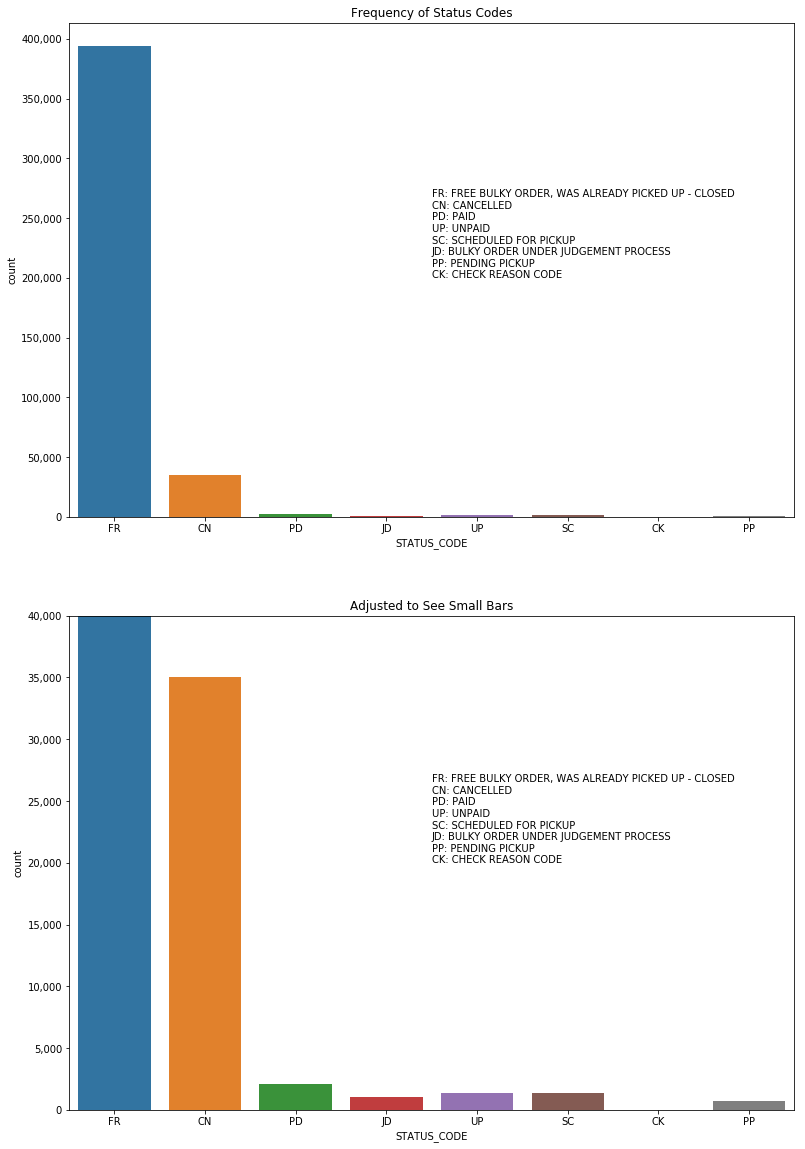

In [24]:
status_code_figure = plt.figure(figsize=(13, 20))
status_code_counts = status_code_figure.add_subplot(211)
sns.countplot(bwpo['STATUS_CODE'], ax=status_code_counts)
status_code_counts.set_title('Frequency of Status Codes')
legend_string = ""
for code, desc in code_dict.items():
    legend_string += ('{}: {}'.format(code, desc) + '\n')
legend_string = legend_string[:len(legend_string)-1]
status_code_counts.text(3.5, 200000, legend_string)
status_code_counts.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
small_bars = status_code_figure.add_subplot(212)
sns.countplot(bwpo['STATUS_CODE'], ax=small_bars)
small_bars.set_ylim(top=40000)
small_bars.text(3.5, 20000, legend_string)
small_bars.set_title('Adjusted to See Small Bars')
small_bars.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.show()

**Results:** 90% of the pickup orders have a status code of "FR: Free Bulky Order, Was Already Picked Up-Closed". I'm not sure why an order would be both free And already picked up?

**Next Question:** I want to look at two relationships: 1) FR vs BULKY_FEE, BULKY_PAID, and TOTAL_DUE and 2) UP vs BULKY_FEE, BULKY_PAID, and TOTAL_DUE.

#### FR: Free Bulky Order, Was Already Picked Up-Closed

/home/nathan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/nathan/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/nathan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


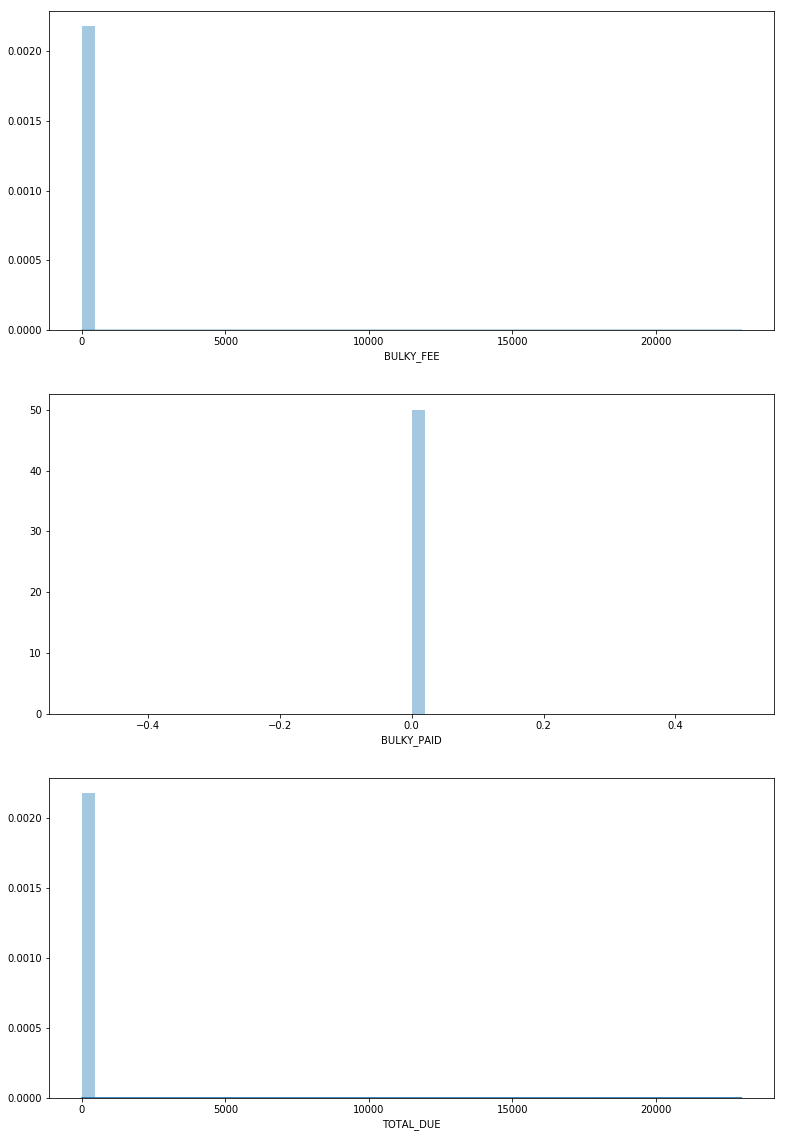

In [35]:
fr_dist_plots = plt.figure(figsize=(13, 20))
fr_BF_ax = fr_dist_plots.add_subplot(311)
sns.distplot(bwpo[bwpo['STATUS_CODE'].isin(['FR'])]['BULKY_FEE'], ax=fr_BF_ax)
fr_BP_ax = fr_dist_plots.add_subplot(312)
sns.distplot(bwpo[bwpo['STATUS_CODE'].isin(['FR'])]['BULKY_PAID'], ax=fr_BP_ax)
fr_TD_ax = fr_dist_plots.add_subplot(313)
sns.distplot(bwpo[bwpo['STATUS_CODE'].isin(['FR'])]['TOTAL_DUE'], ax=fr_TD_ax)

**Thoughts:** These are some bizarre distributions. The BULKY_PAID plot looks about as expected: if the pickup is free, then there would be no fee or payment. But the BULKY_FEE plot appears to have some extremely high fees? So does the TOTAL_DUE plot? Let's look further.

In [37]:
bwpo[bwpo['STATUS_CODE'].isin(['FR'])]['BULKY_FEE'].value_counts()

0.0        393847
20700.0         5
22977.0         2
Name: BULKY_FEE, dtype: int64

In [38]:
bwpo[bwpo['STATUS_CODE'].isin(['FR'])]['BULKY_PAID'].value_counts()

0.0    393854
Name: BULKY_PAID, dtype: int64

In [39]:
bwpo[bwpo['STATUS_CODE'].isin(['FR'])]['TOTAL_DUE'].value_counts()

0.0        393847
20700.0         5
22977.0         2
Name: TOTAL_DUE, dtype: int64

**Sanity Check:** All of these counts add up to 393854, which is the value I got above.

**Results:** It looks like there are 7 exceptions with unusually high values.

**Next Question:** Let's look at the full rows for these exceptions.

In [41]:
bwpo[bwpo['STATUS_CODE'].isin(['FR'])
   & bwpo['BULKY_FEE'] != 0]

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
39425,40425546,18300 NW 47 AVE MIAMI FL 331770000,300,TIRE,nan,nan,661714,0,01/22/2014,01/22/2014,21-LITTER PROGRAM OVC,01/22/2014,01/22/2014,FR,0,1,900,20700.0,0.0,20700.0
301264,40625187,8200 NW 27 AVE MIAMI FL 331470000,300,LITTER,nan,nan,3020,0,05/31/2017,05/31/2017,21-LITTER PROGRAM OVC,05/31/2017,05/31/2017,FR,0,1,999,22977.0,0.0,22977.0
310496,40658824,9000 SW 149 AVE MIAMI FL 331770000,300,OVC,nan,nan,850988,0,12/23/2015,12/28/2015,17-TRASH - ENFORCEMENT OPERATION VACUUM CLEANE...,12/23/2015,12/30/2015,FR,0,2,999,22977.0,0.0,22977.0
364195,40430405,10500 NW 7 AVE MIAMI FL 331500000,300,LITTER,nan,nan,815357,0,08/23/2015,08/23/2015,21-LITTER PROGRAM OVC,08/23/2015,08/24/2015,FR,0,1,900,20700.0,0.0,20700.0
393180,40446385,5400 NW 32 CT MIAMI FL 331420000,300,LITTER,nan,nan,17689,0,07/22/2017,07/22/2017,21-LITTER PROGRAM OVC,07/22/2017,07/24/2017,FR,0,1,900,20700.0,0.0,20700.0
418396,40944364,20899 NW 41 AVE MIAMI FL 331770000,300,OVC,nan,nan,866601,0,02/19/2016,02/22/2016,17-TRASH - ENFORCEMENT OPERATION VACUUM CLEANE...,02/19/2016,03/01/2016,FR,0,15,900,20700.0,0.0,20700.0
428786,40576760,4500 SW 119 AVE MIAMI FL 000000000,300,OVC,nan,nan,25418,0,08/17/2017,08/18/2017,17-TRASH - ENFORCEMENT OPERATION VACUUM CLEANE...,08/17/2017,08/24/2017,FR,0,5,900,20700.0,0.0,20700.0


**Thoughts:**
* They all have the same folio number
* None of them look like they have an owner? TIRE and LITTER seem like unowned trash, I don't know what OVC means.
* OVC is also in the REASON_CODE for some of them. Should look at the full strings, maybe parse the REASON_CODE column later.
* It looks like there might be a correlation between BILLED_YARDS and BULKY_FEE.
* In this case, there is a perfectly logical relationship: TOTAL_DUE = BULKY_FEE - BULKY_PAID.
* I still don't know why the BILLED_YARDS/BULKY_FEE is so high. Is this true for all trash/litter?

#### UP: Unpaid

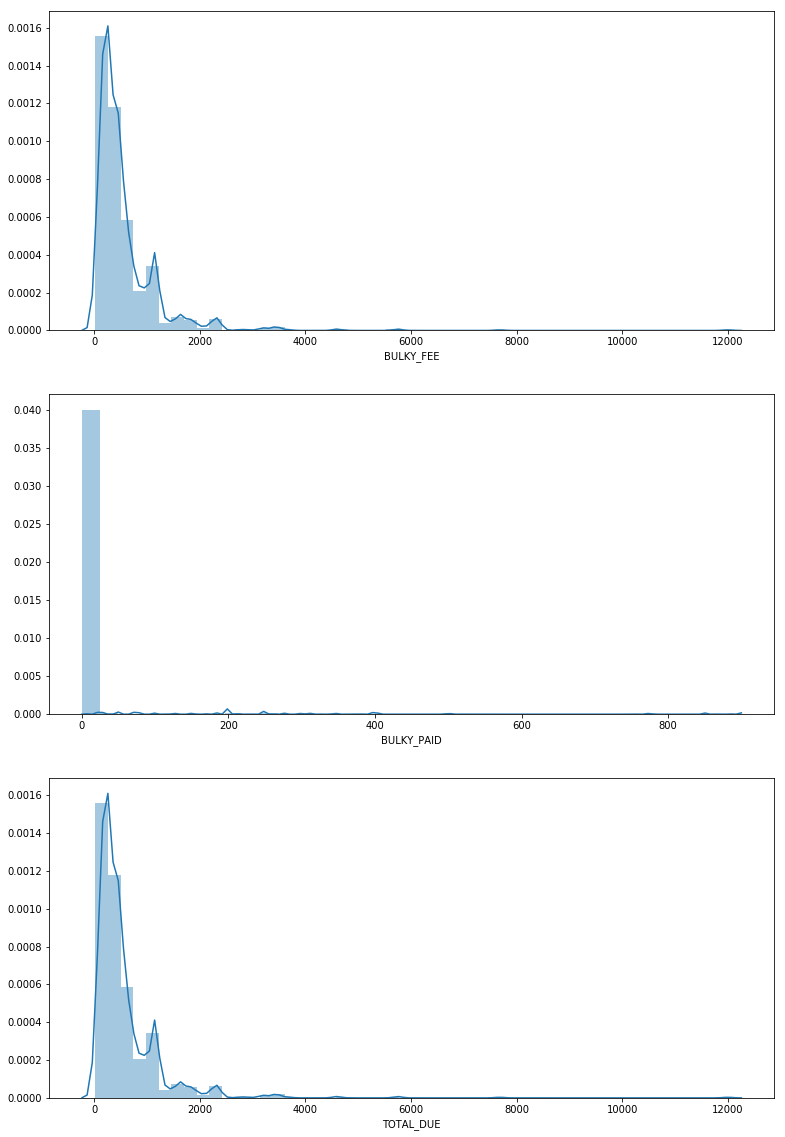

In [49]:
up_dist_plots = plt.figure(figsize=(13, 20))
up_BF_ax = up_dist_plots.add_subplot(311)
sns.distplot(bwpo[bwpo['STATUS_CODE'].isin(['UP'])]['BULKY_FEE'], ax=up_BF_ax)
up_BP_ax = up_dist_plots.add_subplot(312)
sns.distplot(bwpo[bwpo['STATUS_CODE'].isin(['UP'])]['BULKY_PAID'], ax=up_BP_ax)
up_TD_ax = up_dist_plots.add_subplot(313)
sns.distplot(bwpo[bwpo['STATUS_CODE'].isin(['UP'])]['TOTAL_DUE'], ax=up_TD_ax)

**Thoughts:** The distributions look a bit more typical. The BULKY_PAID plot is as expected: If the status code is UP: Unpaid, then they should all be zero. I should look carefully though, the dist line is a little bumpy. There might be exceptions. Also, if UP truly means nothing was paid, then there should be an excellent equivalency relationship between BULKY_FEE and TOTAL_DUE.

In [50]:
bwpo[bwpo['STATUS_CODE'].isin(['UP'])]['BULKY_FEE'].value_counts()

230.00     236
460.00     159
100.00      99
1150.00     94
690.00      87
138.00      85
322.00      68
552.00      53
920.00      47
368.00      41
240.00      38
276.00      38
184.00      30
480.00      26
575.00      23
1610.00     20
2300.00     19
414.00      15
1200.00     13
720.00      12
1380.00     10
345.00       9
1840.00      9
960.00       7
336.00       7
192.00       7
360.00       6
3450.00      6
384.00       6
144.00       6
          ... 
277.00       1
7680.00      1
736.00       1
2880.00      1
1776.00      1
2760.00      1
598.00       1
605.00       1
1075.00      1
840.00       1
900.00       1
1800.00      1
390.00       1
490.00       1
2160.00      1
1000.00      1
300.00       1
201.00       1
1364.00      1
525.00       1
75.00        1
1035.00      1
565.00       1
1650.00      1
365.56       1
26.00        1
150.00       1
46.00        1
1680.00      1
1895.00      1
Name: BULKY_FEE, Length: 105, dtype: int64

In [54]:
bwpo[bwpo['STATUS_CODE'].isin(['UP'])]['BULKY_PAID'].value_counts()

0.00      1357
200.00       6
25.00        4
75.00        3
400.00       3
250.00       3
50.00        2
500.00       1
188.00       1
70.00        1
100.00       1
310.00       1
244.44       1
900.00       1
850.00       1
275.00       1
775.00       1
150.00       1
125.00       1
300.00       1
345.00       1
Name: BULKY_PAID, dtype: int64

In [55]:
bwpo[bwpo['STATUS_CODE'].isin(['UP'])]['TOTAL_DUE'].value_counts()

230.00     236
460.00     159
100.00      99
1150.00     94
690.00      87
138.00      85
322.00      68
552.00      53
920.00      47
368.00      41
240.00      38
276.00      38
184.00      30
480.00      26
575.00      23
1610.00     20
2300.00     19
414.00      15
1200.00     13
720.00      12
1380.00     10
345.00       9
1840.00      9
960.00       7
336.00       7
192.00       7
360.00       6
3450.00      6
384.00       6
144.00       6
          ... 
277.00       1
7680.00      1
736.00       1
2880.00      1
1776.00      1
2760.00      1
598.00       1
605.00       1
1075.00      1
840.00       1
900.00       1
1800.00      1
390.00       1
490.00       1
2160.00      1
1000.00      1
300.00       1
201.00       1
1364.00      1
525.00       1
75.00        1
1035.00      1
565.00       1
1650.00      1
365.56       1
26.00        1
150.00       1
46.00        1
1680.00      1
1895.00      1
Name: TOTAL_DUE, Length: 105, dtype: int64

In [63]:
# BROKEN: doesn't limit to UP status codes?

bwpo[bwpo['STATUS_CODE'].isin(['UP'])
   & bwpo['BULKY_FEE'] == bwpo['TOTAL_DUE']]

,ACCOUNT_NO,PROPERTY_ADDRESS,FOLIO_NUMBER,OWNER,OWNER_PHONE,LEGAL_DESC,WORK_ORDER,SUFFIX,ORDER_DATE,PICKUP_DATE,REASON_CODE,REQUEST_DATE,BILL_DATE,STATUS_CODE,ESTIMATED_YARDS,PICKED_YARDS,BILLED_YARDS,BULKY_FEE,BULKY_PAID,TOTAL_DUE
0,40592601,17900 NE 7 AVE MIAMI FL 000000000,300,OVC,nan,nan,784775,0,05/08/2015,05/11/2015,30-SHOPPING CARTS,05/08/2015,05/12/2015,FR,0,6,0,0.0,0.0,0.0
1,12058766,29811 SW 147 AVE MIAMI FL 330333858,3079100010120,ROSA MARIA MENDOZA,nan,H HABITABLE 10/7,50323,0,12/18/2017,01/01/2018,NORMAL PICKUP REQUEST,12/20/2017,01/03/2018,FR,0,2,0,0.0,0.0,0.0
2,40361386,9700 NW 36 AVE MIAMI FL 331470000,300,OVC/HOT SPOT,nan,nan,783965,0,05/05/2015,05/07/2015,17-TRASH - ENFORCEMENT OPERATION VACUUM CLEANE...,05/05/2015,05/08/2015,CN,0,0,0,0.0,0.0,0.0
3,13024213,16074 SW 148 TERR MIAMI FL 331960000,3059200070630,JORGE F ORJALES &W TERESA,nan,SHOREWAY L47 B2 156-38,783223,0,05/04/2015,05/08/2015,NORMAL PICKUP REQUEST,05/04/2015,05/12/2015,FR,0,5,0,0.0,0.0,0.0
4,11972067,19613 SW 87 CT MIAMI FL 331578921,3660040270160,DAVID FONSECA,7868779369,nan,52076,0,12/22/2017,01/01/2018,NORMAL PICKUP REQUEST,12/23/2017,01/03/2018,FR,0,8,0,0.0,0.0,0.0
5,12147080,11875 SW 19 LN 163 MIAMI FL 33175...,3049120631630,LINDA A VASSEROT,nan,nan,72337,0,03/13/2018,03/20/2018,NORMAL PICKUP REQUEST,03/13/2018,03/22/2018,FR,0,15,0,0.0,0.0,0.0
6,10190371,12702 SW 116 TER MIAMI FL 331864650,3059110161170,YVONNE M CONDE &H PEDRO JR,nan,UD UNINHABITABLE DESTROYED 11/25,32315,0,09/16/2017,09/16/2017,23-SPECIAL PROGRAM OVC (HURRICANE/EMERGENCY RE...,09/16/2017,09/18/2017,FR,0,10,0,0.0,0.0,0.0
7,40775115,15000 NW 117 AVE MIAMI FL 330180000,300,COMPLAINT,nan,nan,874543,0,03/17/2016,03/19/2016,18-TIRES - ENFORCEMENT OVC,03/17/2016,03/22/2016,FR,0,35,0,0.0,0.0,0.0
8,40621533,3500 NW 35 AVE MIAMI FL 331420000,300,OVC,nan,nan,769385,0,03/12/2015,03/12/2015,30-SHOPPING CARTS,03/12/2015,05/07/2015,FR,0,1,0,0.0,0.0,0.0
9,11790147,14520 BUCHANAN ST MIAMI FL 331767510,3050190010470,ELISEO SUAREZ &W MARGARET PATT,nan,H HABITABLE 10/2,783339,0,05/04/2015,05/08/2015,NORMAL PICKUP REQUEST,05/04/2015,05/12/2015,FR,0,5,0,0.0,0.0,0.0


In [56]:
bwpo[bwpo['STATUS_CODE'].isin(['UP'])
   & bwpo['BULKY_FEE'] != bwpo['TOTAL_DUE']].shape[0]

1399

# Exploring Variable Relationships

# NOTE: ADD SCATTER PLOT FOR STATUS_CODE VS THE THREE DOLLAR COLUMNS

I have a hypothesis I want to test and explore.

**Fee Formula Hypothesis:** TOTAL_DUE = BULKY_FEE - BULKY_PAID

In [47]:
print('Entries for which this is True : {}'.format(bwpo[bwpo['TOTAL_DUE'] == bwpo['BULKY_FEE'] - bwpo['BULKY_PAID']].shape[0]))
print('Entries for which this is False: {}'.format(bwpo[bwpo['TOTAL_DUE'] != bwpo['BULKY_FEE'] - bwpo['BULKY_PAID']].shape[0]))

Entries for which this is True : 433486
Entries for which this is False: 2130


**Results:** My hypothesis is false. It held true for ~99.5% of my data. This leads me to believe that I am on the right track. Either the entries that fail my hypothesis are incorrect or there is a minor variable that I do not see.

**Next Question:** How do these two subsets differ?

In [48]:
fee_formula_hyp_true = bwpo[bwpo['TOTAL_DUE'] == bwpo['BULKY_FEE'] - bwpo['BULKY_PAID']]
fee_formula_hyp_false = bwpo[bwpo['TOTAL_DUE'] != bwpo['BULKY_FEE'] - bwpo['BULKY_PAID']]